### <font color='darkred'>IA Aplicado a Finanças</font>

### <font color='darkgreen'>Estruturação de Derivativos Para Hedging de Riscos de Commodities</font>

### <font color='darkblue'> Parte 2 - Modelagem Estatística </font>

### <font color = darkred> Carregando Dados </font>

In [1]:
# Versão do Python usado nesse notebook
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Etapa 2 - Modelagem Estatística

# Imports
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA #usando fç ARIMA, dos pacotes model, que pertence ao pacote ARIMA

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

matplotlib : 3.7.1
numpy      : 1.23.5
pandas     : 1.5.3
statsmodels: 0.14.0
platform   : 1.0.8



### <font color = darkred> Parte 2 - Modelagem Estatística </font>

- Simulador Para Estratégia de Hedge com Modelagem Estatística

In [4]:
# Definimos a semente (Apenas para reproduzir o projeto. Em produção pode ser removido!)
# Pacote SEED, para reproduzir o mesmo resultado, pra checar progresso no modelo
# reproduz o padrão de inicio da aleatoriedade será sempre o mesmo mantendo e o processo de geração aleatorio
SEED = 142
random.seed(SEED)
np.random.seed(SEED)

In [5]:
# Carrega o arquivo CSV
df = pd.read_csv("preco_petroleo.csv")

In [6]:
# A analise exploratoria da série temporal e explicação dos parametros do order estão no projeto1 deste repositorio
# Como os dados foram criados para esse notebook, possuem as carateristicas que o modelo precisa receber
# Cria o modelo ARIMA
modelo = ARIMA(df['PrecoPetroleo'], order = (5,1,0))

In [7]:
# Treina o modelo
modelo_treino = modelo.fit()

In [8]:
# Previsão para o preço do petroleo nos próximos 30 períodos (dias) - Forecast
# Estamos prevendo o preço do petróleo em um horizonte de 30 dias
# usando o modelo já treinado (acima) com 30 periodos, com metodo forecast
output = modelo_treino.forecast(steps = 30)

In [9]:
# O drift e a volatilidade serão calculados usando as previsões do modelo ARIMA e depois utilizados na Simulação Monte Carlo. 

# Vamos calcular o drift e a volatilidade com base nas previsões do modelo ARIMA, (output acima)
# Calculamos primeiro os retornos previstos
retornos_previstos = np.diff(output) / output[:-1]  

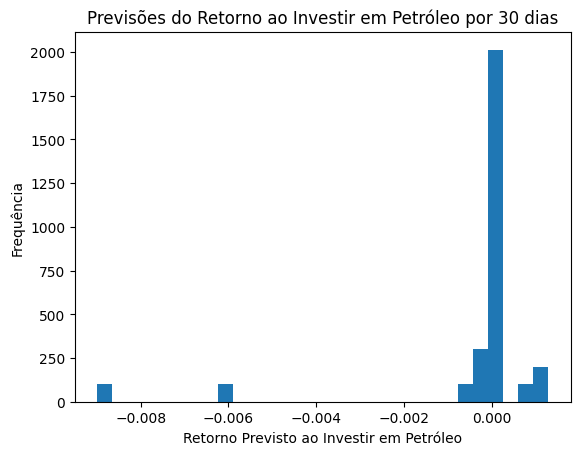

In [10]:
# Plot das previsões do modelo
plt.hist(retornos_previstos, bins = 30, density = True)
plt.title('Previsões do Retorno ao Investir em Petróleo por 30 dias')
plt.xlabel('Retorno Previsto ao Investir em Petróleo')
plt.ylabel('Frequência')
plt.savefig('ME_previsoes_retornos.png')
plt.show()

OBS: Na geração de dados passamos valores dados de drift e volatilidade (volatilidade = 0.1 e drift = 0.0002), para criar a massa de dados que usamos para prever o modelo e com ele os retornos previstos. Agora estamos calculando tendencia e volatilidade em cima dos dados previstos

In [11]:
# A média dos retornos usaremos como drift
drift = np.mean(retornos_previstos) 

In [12]:
# O desvio padrão dos retornos usaremos como volatilidade
volatilidade = np.std(retornos_previstos) 

In [13]:
print("\nDrift previsto com base no modelo estatístico:")
print(drift)
print("\nVolatilidade prevista com base no modelo estatístico:")
print(volatilidade)


Drift previsto com base no modelo estatístico:
-0.0004373460427165814

Volatilidade prevista com base no modelo estatístico:
0.0019976826889350876


### <font color = darkred> Simulação de Monte Carlo </font>

In [14]:
# Número de simulações
n_simulations = 1000

In [15]:
# Lista para 30 dias de previsões
forecast_30d = []

In [16]:
# Inicia um loop para realizar 'n_simulations' simulações.
# o underline é só pra repetir as operações abaixo n vezes, não vai extrair nenhum resultado
for _ in range(n_simulations):  
    
    # Inicia uma lista com o último preço (indexação -1) de petróleo observado.
    precos_simulados = [df['PrecoPetroleo'].iloc[-1]]  

    # Inicia um loop para simular preços durante 30 dias.
    for i in range(30):  
        
        # Calcula um novo preço simulado usando o último preço, o drift e a volatilidade.
        # pega o ultimo valor (-1) e multiplica pelo exponencial de uma distribuição gaussiana randomica do drift e da vol
        preco_simulado = precos_simulados[-1] * np.exp(random.gauss(drift, volatilidade))  

        # Adiciona o novo preço simulado à lista de preços simulados.
        precos_simulados.append(preco_simulado)  

    # Adiciona o último preço simulado à lista 'forecast_30d' que guarda as simulações.
    forecast_30d.append(precos_simulados[-1])  

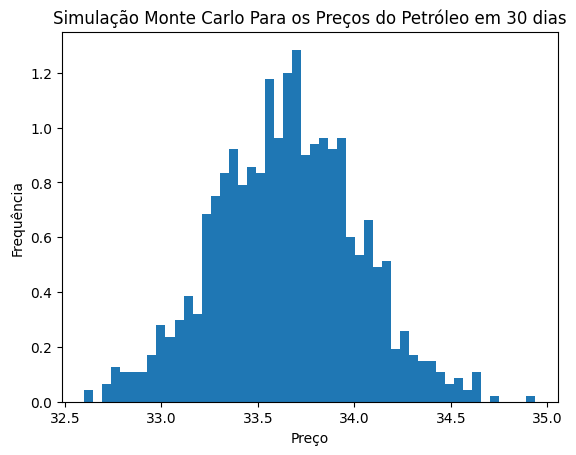

In [17]:
# Plot do forecast_30d
plt.hist(forecast_30d, bins = 50, density = True)
plt.title('Simulação Monte Carlo Para os Preços do Petróleo em 30 dias')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.savefig('ME_previsoes_precos_smc.png')
plt.show()

**A Simulação de Monte Carlo** é uma técnica matemática que permite a modelagem de sistemas  complexos  através  da  simulação  de  variáveis  aleatórias.  O  método  é  amplamente utilizado em diversas áreas, como finanças, engenharia, física, ciência da computação, estatística e até mesmo em jogos e animações. Na Engenharia Financeira é especialmente útil para avaliar incertezas e riscos em modelos financeiros.

**Funcionamento Básico:** O processo começa com a definição de um modelo que descreve o sistema que você deseja  analisar.  Esse  modelo  inclui  variáveis,  que  podem  ser determinísticas  (fixas)  ou estocásticas (aleatórias).

**Identificação  das  Variáveis  Aleatórias:**  O  primeiro  passo  é  identificar  as  variáveis aleatórias  do  modelo.  Em  finanças,  essas  podem  incluir  taxas  de  juros,  preços  de  ativos, volatilidades, entre outras.

**Distribuição de Probabilidade:** Para cada variável aleatória, você define uma distribuição de probabilidade baseada em dados históricos ou conhecimento especializado.

**Geração  de  Amostras:**  Utilizando  um  gerador  de  números  aleatórios,  amostras  são retiradas dessas distribuições de probabilidade.

**Cálculo dos Resultados:** Para cada conjunto de amostras, o resultado é calculado usando o modelo financeiro.

**Análise dos Resultados:** Após várias rodadas de simulação (frequentemente milhares ou até milhões), os resultados são analisados para obter métricas como média, mediana, desvio padrão  e  percentis,  proporcionando  uma  representação  da  incerteza  ou  risco  associado  ao sistema.

> **Aplicações em Finanças:**

- Precificação de Opções: Para opções com características complexas que não podem ser facilmente precificadas através de modelos analíticos como o Black-Scholes.


- Gestão  de  Risco:  Avaliação  do  Value-at-Risk  (VaR)  e  outros  indicadores  de  risco  em portfólios financeiros.


- Otimização  de  Portfólio:  Identificar  a  combinação ótima  de  ativos  para  maximizar  o retorno para um dado nível de risco.


- Decisões de Investimento: Simulação de diferentes cenários de mercado para avaliar o potencial de retorno e risco de investimentos.


- Estratégias de Hedging: Avaliar a eficácia de diferentes estratégias de hedge sob diversas condições de mercado.

> **Vantagens:** Permite  modelar  sistemas  complexos  e  não-lineares  que  são  difíceis  de  resolver analiticamente.Oferece uma visão mais completa das possíveis variações e resultados, incluindo eventos de cauda longa (outliers).

> **Desvantagens:** Computacionalmente intensivo, requerendo hardware poderoso e tempo para executar simulações em grande escala.A qualidade dos resultados depende da precisão das distribuições de probabilidade e do modelo utilizado.

A  Simulação  de  Monte  Carlo  é  uma  ferramenta  poderosa  para  modelar  incertezas  e avaliar diversas métricas em modelos financeiros. É especialmente útil quando as equações que descrevem o sistema são complexas ou não têm soluções analíticas fáceis. 


### <font color = darkred> Estratégia de Hedge </font>

In [18]:
# Custo corrente do petróleo é o último valor da série de dados
# esse fator é definido com varias bases (experiencia do gestor, previsão, mercado, 
# serve pra somar informação de variabilidade
custo_corrente_petroleo = 1.5 * df['PrecoPetroleo'].iloc[-1]

In [19]:
# O custo futuro do petróleo é a média das simulações de 30 dias multiplicada pelo fator 1.5
custo_futuro_petroleo = 1.5 * np.mean(forecast_30d)

In [20]:
# Suponha que você consome 1000 barris por dia
consumo_diario = 1000  

In [21]:
# Custo futuro sem hedge
custo_futuro_sem_hedge = custo_futuro_petroleo * consumo_diario * 30

In [22]:
# Suponha que o contrato de futuros permite que você fixe o preço do petróleo em $35
preco_contrato_futuro = 45

In [23]:
# Calculamos o custo futuro considerando o instrumento financeiro (contrato futuro)
custo_futuro_petroleo_com_hedge = 1.5 * preco_contrato_futuro

In [24]:
# Custo futuro com estratégia de Hedge. Estamos reduzindo o risco, pois temos o preço do petróleo fixado 
# através de um instrumento financeiro
custo_futuro_com_hedge = custo_futuro_petroleo_com_hedge * consumo_diario * 30

print(f"\nCusto futuro sem hedge: ${custo_futuro_sem_hedge:.3f}")
print(f"\nCusto futuro com hedge: ${custo_futuro_com_hedge:.3f}")


Custo futuro sem hedge: $1514263.474

Custo futuro com hedge: $2025000.000


In [25]:
# Verifica o resultado e imprime a conclusão
if custo_futuro_com_hedge < custo_futuro_sem_hedge:
    print("\nA estratégia de Hedge resultou em economia.")
else:
    print("\nA estratégia de Hedge não resultou em economia.")


A estratégia de Hedge não resultou em economia.


In [26]:
print("\nFim\n")


Fim

